# Step0: Install requirements.

In [1]:
!nvidia-smi

Sat Oct 15 21:31:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
!git pull
!git push

In [6]:
import os
if os.path.isdir("/content/drive/MyDrive/colab/StyleGAN-Human"):
  %cd "/content/drive/MyDrive/colab"
elif os.path.isdir("/content/drive/MyDrive/colab"):
  #install script
  %cd "/content/drive/MyDrive/colab"
  !git clone https://github.com/mgzzl/StyleGAN-Human
else:
  %cd "/content/drive/MyDrive"
  !mkdir colab
  %cd "/content/drive/MyDrive/colab"
  !git clone https://github.com/mgzzl/StyleGAN-Human

/content/drive/MyDrive/colab
Cloning into 'StyleGAN-Human'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 371 (delta 67), reused 128 (delta 30), pack-reused 178
Receiving objects: 100% (371/371), 75.90 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Checking out files: 100% (170/170), done.


In [7]:
!pip install ninja lpips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 4.9 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 


# Step1: Download pretrained models.

In [8]:
# %tensorflow_version 1.x 
import os
repo_name='StyleGAN-Human'
os.chdir(f'./{repo_name}')

In [9]:
def get_download_model_command(file_id, file_name):
    """ Get wget download command for downloading the desired model and save to directory ../pretrained_models. """
    current_directory = os.getcwd()
    save_path = os.path.join(os.path.dirname(current_directory), f'{repo_name}',"pretrained_models")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    url = r"""wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILE_ID}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={FILE_ID}" -O {SAVE_PATH}/{FILE_NAME} && rm -rf /tmp/cookies.txt""".format(FILE_ID=file_id, FILE_NAME=file_name, SAVE_PATH=save_path)
    return url

In [10]:
MODEL_PATHS = {
    "stylegan1_1024": {"id": "1h-R-IV-INGdPEzj4P9ml6JTEvihuNgLX", "name": "stylegan1_1024.pkl"},
    "stylegan2_1024": {"id": "1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5", "name": "stylegan2_1024.pkl"},
    "stylegan2_512": {"id": "1dlFEHbu-WzQWJl7nBBZYcTyo000H9hVm", "name": "stylegan2_512.pkl"},
    "stylegan3_512": {"id": "1_274jk_N6WSCkKWeu7hjHycqGvbuOFf5", "name": "stylegan3_512.pkl"},
    # "stylegan3_1024": {"id": None, "name": "stylegan3_1024.pkl"},
    # "stylegan1_512": {"id": None, "name": "stylegan1_512.pkl"},
}

In [11]:
#@title Select which experiment you wish to perform inference on: { run: "auto" }
experiment_type = 'stylegan2_1024' #@param ['stylegan1_1024', 'stylegan2_1024', 'stylegan1_512', 'stylegan2_512', 'stylegan3_512']

In [12]:
path = MODEL_PATHS[experiment_type]
download_command = get_download_model_command(file_id=path["id"], file_name=path["name"])
!{download_command}

--2022-10-15 21:39:46--  https://docs.google.com/uc?export=download&confirm=t&id=1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5
Resolving docs.google.com (docs.google.com)... 142.250.125.101, 142.250.125.139, 142.250.125.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5k2n77tol8vg4f5lmulqnf988dqodk3h/1665869925000/01844016854614948534/*/1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5?e=download&uuid=116f6f19-1cfb-4c99-97f7-22c9ab37d1b2 [following]
--2022-10-15 21:39:46--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5k2n77tol8vg4f5lmulqnf988dqodk3h/1665869925000/01844016854614948534/*/1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5?e=download&uuid=116f6f19-1cfb-4c99-97f7-22c9ab37d1b2
Resolving doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)... 64.233.182.1

# Step2: Generate full-body images using different models.


In [13]:
version=experiment_type.split("_")[0][-1]

In [ ]:
!python generate.py --outdir=outputs/{experiment_type}/ --seeds=10-20 --trunc=0.7 --network=pretrained_models/{experiment_type}.pkl --version {version}

Loading networks from "pretrained_models/stylegan2_1024.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [25]:
!python generate.py --outdir=/content/{experiment_type}/ --seeds=10-20 --trunc=0.7 --network=pretrained_models/{experiment_type}.pkl --version {version}

Loading networks from "pretrained_models/stylegan2_1024.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


# Step3: Visualize

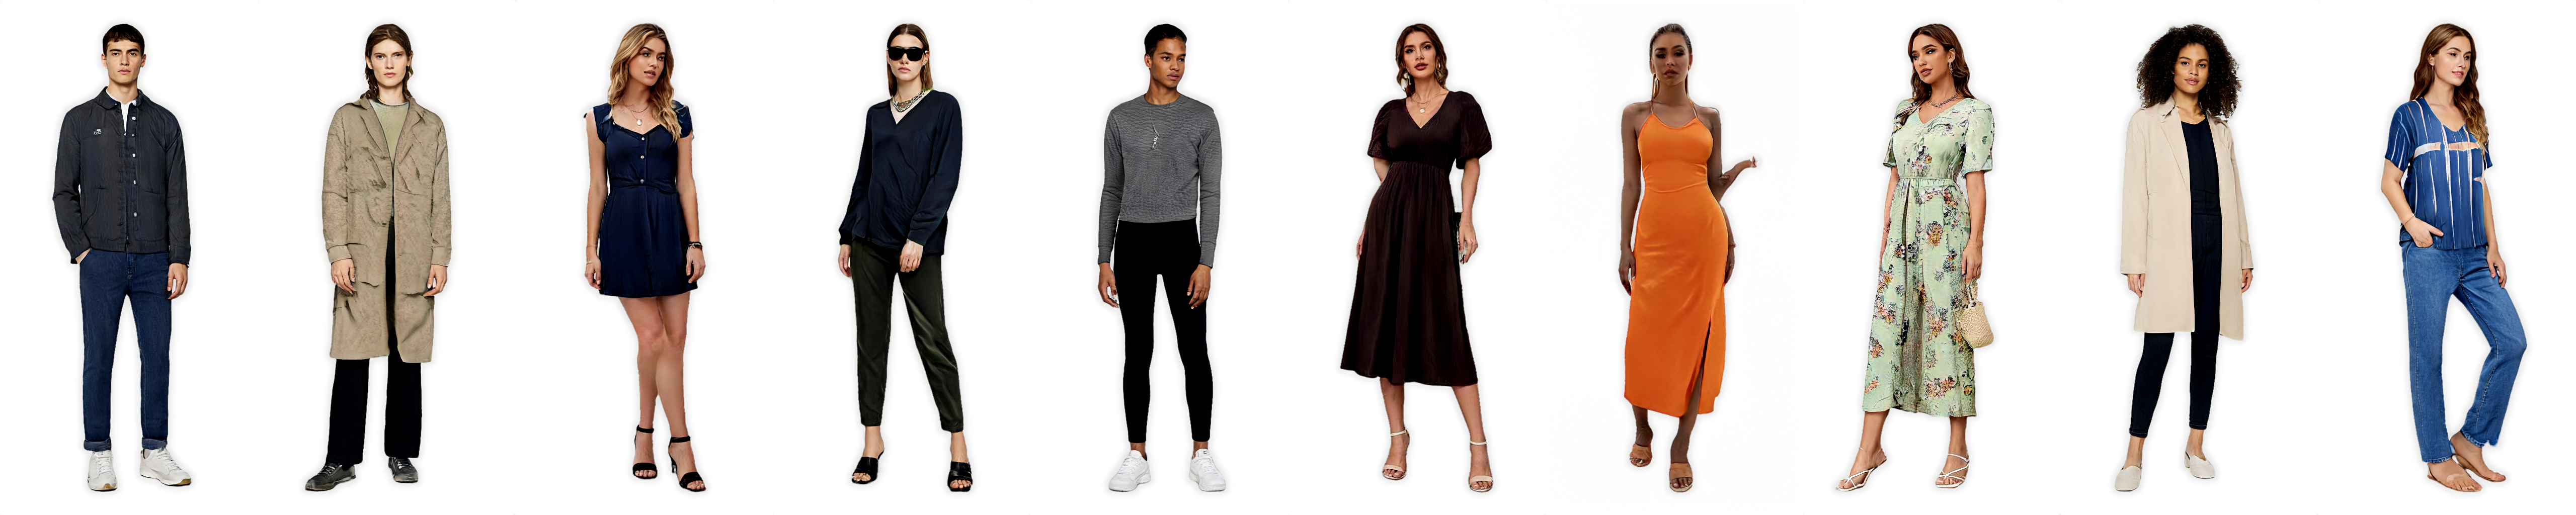

In [28]:
from PIL import Image
import cv2
import numpy as np
output_images = [os.path.join(f"/content/{experiment_type}", x) for x in os.listdir(f"/content/{experiment_type}")]
sample_images = output_images[:10]
for idx, image_path in enumerate(sample_images):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if idx == 0:
        res = image
    else:
        res = np.concatenate([res, image], axis=1)

res = Image.fromarray(res)
res

# Application 1: Editing & Style-mixing:

In [ ]:
# editing
#'upper_length' or 'bottom_length'
!python edit.py --outdir outputs/editing --network pretrained_models/stylegan2_1024.pkl --attr_name upper_length --seeds 61531,61570,61571,61610 

start...


In [ ]:
# style-mixing
!python style_mixing.py --outdir=outputs/stylemixing --rows=85,100,75,458,1500 --cols=55,821,1789,293 --network=pretrained_models/stylegan2_1024.pkl --styles=0-3

Loading networks from "pretrained_models/stylegan2_1024.pkl"...
Generating W vectors...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Generating images...
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating style-mixed images...
Saving image grid...


# Application 2: Alignment:

## Application 2.1: Face-Alignment:

In [33]:
from pathlib import Path
orig_img_path = Path('imgs')
aligned_imgs_path = Path('aligned_imgs')

# Make Aligned Images folder if it doesn't exist.
if not aligned_imgs_path.exists():
    aligned_imgs_path.mkdir()

# Make Images folder if it doesn't exist.
if not orig_img_path.exists():
    orig_img_path.mkdir()
    
orig_img_path, aligned_imgs_path

if not Path('/content/drive/MyDrive/colab/StyleGAN-Human/pretrained_models/shape_predictor_68_face_landmarks.dat').exists():
    %cd "/content/drive/MyDrive/colab/StyleGAN-Human/pretrained_models/"
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bzip2 -dv shape_predictor_68_face_landmarks.dat.bz2
    %cd "/content/drive/MyDrive/colab/StyleGAN-Human"

In [34]:
from align_face import align_face

# Align all of our images using a landmark detection model!
all_imgs = list(orig_img_path.iterdir())
for img in all_imgs:
    align_face(str(img)).save(aligned_imgs_path/('aligned_'+img.name))

Number of faces detected: 1
Detection 0: Left: 498 Top: 112 Right: 765 Bottom: 379
Part 0: (524, 209), Part 1: (526, 236) ...
Number of faces detected: 1
Detection 0: Left: 429 Top: 890 Right: 1809 Bottom: 2270
Part 0: (410, 1278), Part 1: (417, 1458) ...


## Application 2.2: Body Alignment:

For alignment, we use [openpose-pytorch](https://github.com/Hzzone/pytorch-openpose) for body-keypoints detection and [PaddlePaddle](https://github.com/PaddlePaddle/PaddleSeg/tree/release/2.5/contrib/PP-HumanSeg) for human segmentation.
Before running the alignment script, few models need to be installed:
1. download [body_pose_model.pth](https://drive.google.com/drive/folders/1JsvI4M4ZTg98fmnCZLFM-3TeovnCRElG?usp=sharing) and place it into openpose/model/.
2. download and extract [deeplabv3p_resnet50_os8_humanseg_512x512_100k_with_softmax](https://paddleseg.bj.bcebos.com/dygraph/humanseg/export/deeplabv3p_resnet50_os8_humanseg_512x512_100k_with_softmax.zip) into PP_HumanSeg/export_model/deeplabv3p_resnet50_os8_humanseg_512x512_100k_with_softmax.
3. download and extract [deeplabv3p_resnet50_os8_humanseg_512x512_100k](https://paddleseg.bj.bcebos.com/dygraph/humanseg/train/deeplabv3p_resnet50_os8_humanseg_512x512_100k.zip) into PP_HumanSeg/pretrained_model/deeplabv3p_resnet50_os8_humanseg_512x512_100k.
4. install paddlepaddel: ``` pip install paddleseg ```*kursiver Text*

In [ ]:
!pip install paddleseg

In [ ]:
!python alignment.py --image-folder 'imgs' --output-folder 'aligned_imgs'

# Application 3: InsetGAN (use StyleGAN2-FFHQ as face generator):

In [ ]:
## Download pretrained StyleGAN on FFHQ 1024x1024 and dlib dat.
ffhq_ckpt = get_download_model_command(file_id="125OG7SMkXI-Kf2aqiwLLHyCvSW-gZk3M", file_name='ffhq.pkl')
dlib_detector = get_download_model_command(file_id="1MduBgju5KFNrQfDLoQXJ_1_h5MnctCIG", file_name='mmod_human_face_detector.dat')
dlib_landmark = get_download_model_command(file_id="1A82DnJBJzt8wI2J8ZrCK5fgHcQ2-tcWM", file_name='shape_predictor_68_face_landmarks.dat')
!{ffhq_ckpt}
!{dlib_detector}
!{dlib_landmark}

In [ ]:
!pip uninstall dlib -y

In [ ]:
 !pip install -v --install-option="--no" --install-option="DLIB_USE_CUDA" dlib

In [ ]:
# Perform joint optimization and generate seamless images
!python insetgan.py --face_seed=9 --body_seed=89180 \
                    --joint_steps=500 --outdir outputs/insetgan --video 1